<a href="https://colab.research.google.com/github/sanemar/telecomx/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Readme

Como desafio adicional, crie um README.md para seu projeto Telecom X, incluindo:

*   O propósito da análise realizada.
*   Estrutura do projeto e organização dos arquivos.
*   Exemplos de gráficos e insights obtidos.
*   Instruções para executar o notebook.

O projeto "Churn de Clientes" da empresa Telecom X consiste em descobrir o motivo do alto índice de cancelamentos e precisa esclarecer os fatores que a levam à perda de clientes.

Seu desafio será coletar, tratar e analisar os dados, utilizando Python e suas principais bibliotecas para extrair insights valiosos. A partir da sua análise, os demais colegas da  equipe de Data Science poderá avançar para modelos preditivos e desenvolver estratégias para reduzir a evasão.


# Importação

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.subplots as sp
import seaborn as sns

#📌 Extracão

In [2]:
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


# Normalizando os dados do Dataframe

In [3]:
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
df = pd.read_json(url)

df_normalizado = df.copy()
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

df_normalizado = df_normalizado.join(customer_df).join(phone_df).join(internet_df).join(account_df)

#Remove as colunas que eram os dicionários de dados
df_normalizado.drop(['customer', 'phone', 'internet', 'account'], axis=1, inplace=True)

display(df_normalizado.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# Dicionário de Dados

Dicionário de dados:

*   CustomerID = código único de identificação do cliente
*   Churn = indica que o cliente permanece como cliente
*   Gender = gênero do cliente (masculino ou feminino)
*   SeniorCitizen = indica se o cliente possui mais de 65 anos
*   Partner = indica se o cliente possui parceiro(a)
*   Dependents = indica se o cliente possui dependentes
*   Tenure = indica o tempo de contrato do cliente em meses
*   PhoneService = indica se o cliente possui um serviço de telefonia
*   MultipleLines = indica se o cliente possui mais de um serviço de telefonia associado
*   InternetService = indica se o cliente possui plano de internet
*   OnlineSecurity = indica um plano adicional de segurança
*   OnlineBackup = indica um plano adicional de backup
*   DeviceProtection = indica um plano adicional de proteção do dispositivo
*   TechSupport = indica um plano de suporte técnico
*   StreamingTV = indica se o cliente possui assinatura de TV
*   StreamingMovies = indica se o cliente possui streaming de filmes
*   Contract = indica o tipo de contrato(plano)
*   PaperlessBilling = indica se o cliente optou por fatura impressa
*   PaymentMethod = indica a forma de pagamento
*   ChargesMonthly = total de todos os serviços que o cliente contrata por mês
*   ChargesTotal = indica o total faturado para o cliente


#🔧 Transformação

In [4]:
df_normalizado.dtypes


,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [5]:
# alterando o tipo da coluna Carges.Total para float64

df_normalizado['Charges.Total'] = pd.to_numeric(df_normalizado['Charges.Total'], errors='coerce')

In [6]:
df_normalizado.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [7]:
df_normalizado.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [10]:
#Removendo as linhas sem informação da coluna Charges.Total - 11 no total
df_normalizado = df_normalizado.dropna(subset=['Charges.Total'])
print(f"Total de linhas com valores nulos na coluna Charges.Total: {df_normalizado['Charges.Total'].isnull().sum()}. \
       \nO total de linhas do dataframe é: {df_normalizado.shape[0]}")

Total de linhas com valores nulos na coluna Charges.Total: 0.        
O total de linhas do dataframe é: 7256


In [13]:
#Também preciso descobrir quais as linhas que possuem valores vazios em alguma das colunas
colunas = df_normalizado.columns.tolist()[1:]
for coluna in colunas:
   if df_normalizado[coluna].dtype =='object':
    print(f"A coluna {coluna}: {df_normalizado[coluna].unique()}.")


A coluna Churn: ['No' 'Yes' ''].
A coluna gender: ['Female' 'Male'].
A coluna Partner: ['Yes' 'No'].
A coluna Dependents: ['Yes' 'No'].
A coluna PhoneService: ['Yes' 'No'].
A coluna MultipleLines: ['No' 'Yes' 'No phone service'].
A coluna InternetService: ['DSL' 'Fiber optic' 'No'].
A coluna OnlineSecurity: ['No' 'Yes' 'No internet service'].
A coluna OnlineBackup: ['Yes' 'No' 'No internet service'].
A coluna DeviceProtection: ['No' 'Yes' 'No internet service'].
A coluna TechSupport: ['Yes' 'No' 'No internet service'].
A coluna StreamingTV: ['Yes' 'No' 'No internet service'].
A coluna StreamingMovies: ['No' 'Yes' 'No internet service'].
A coluna Contract: ['One year' 'Month-to-month' 'Two year'].
A coluna PaperlessBilling: ['Yes' 'No'].
A coluna PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)'].


In [14]:
#A coluna Churn possui valores vazios, praciso remover as linhas que não possuem valores - 224 linhas
len(df_normalizado[df_normalizado['Churn'] == ''])

224

In [16]:
#Removendo as linhas do dataframe com Churn vazio
df_normalizado = df_normalizado[df_normalizado['Churn'] != '']

comprimento_df = len(df_normalizado)
churn_vazio = len(df_normalizado[df_normalizado['Churn'] == ''])

print(f"Churn vazio {churn_vazio} linhas sem valor na coluna Churn de um total de {comprimento_df} linhas")


Churn vazio 0 linhas sem valor na coluna Churn de um total de 7032 linhas


,count
Churn,
No,5163
Yes,1869
,224


,proportion
Churn,
No,71.154906
Yes,25.757993
,3.087100


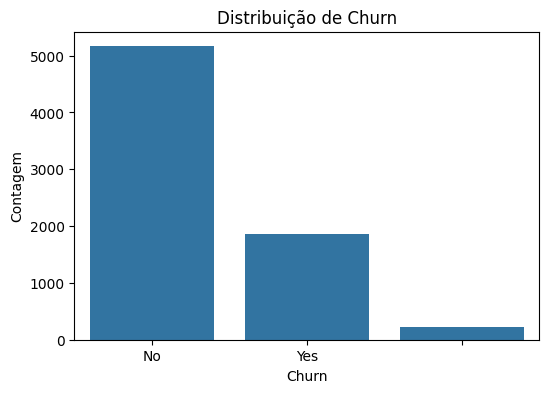

In [12]:
# Explore the distribution of Churn
display(df_normalizado['Churn'].value_counts())
display(df_normalizado['Churn'].value_counts(normalize=True) * 100)

# Visualize the distribution of Churn
plt.figure(figsize=(6, 4))
sns.countplot(data=df_normalizado, x='Churn')
plt.title('Distribuição de Churn')
plt.xlabel('Churn')
plt.ylabel('Contagem')
plt.show()

#📊 Carga e análise

#📄Relatorio Final

,count
Churn,
No,5163
Yes,1869
,224


,proportion
Churn,
No,71.154906
Yes,25.757993
,3.087100


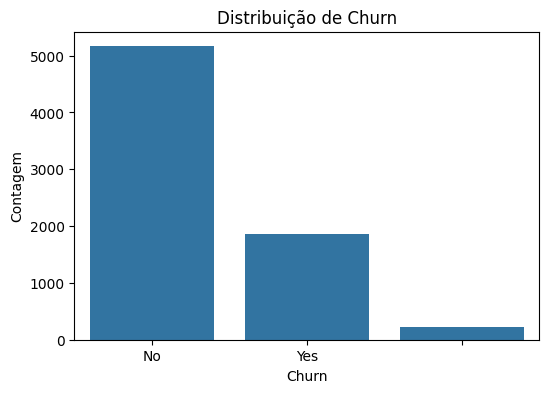